# Predictive Modeling of Breast Cancer 
The goal of this exploratory study was to develop and assess a prediction model which can potentially
be used as a biomarker of breast cancer, based on anthropometric data and parameters which can be gathered in
routine blood analysis.

Ref:Patrício M, et al. Using Resistin, glucose, age and BMI to predict the presence of breast cancer BMC Cancer (2018) 18:29

# Data Sources
The data from 116 patients with 10 features e will be used for this study.  The study is documented on the UCI ML dataset (https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Coimbra) and data will be requested from the corresponding author of the study Dr. Miguel Patricio, Laboratory of Biostatistics and Medical Informatics and IBILI - Faculty of Medicine, University of Coimbra, Azinhaga Santa Comba, Celas, 3000-548 Coimbra, Portugal.


# Data Set Information:

There are 10 predictors, all quantitative, and a binary dependent variable, indicating the presence or absence of breast cancer. 
The predictors are anthropometric data and parameters which can be gathered in routine blood analysis. 
Prediction models based on these predictors, if accurate, can potentially be used as a biomarker of breast cancer.




# Attribute Information:

Quantitative Attributes: Age (years) BMI (kg/m2) Glucose (mg/dL) Insulin (µU/mL) HOMA Leptin (ng/mL) Adiponectin (µg/mL) Resistin (ng/mL) MCP-1(pg/dL)

##Labels: 1=Healthy controls 2=Patients

# Packages and Library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import graphviz 
%matplotlib inline

# Data download and initial observation

In [2]:
blood_analysis = pd.read_csv('data/Bloodwork_BC.csv')
blood_analysis.shape ##(116, 10)
blood_analysis.columns

Index(['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin',
       'Resistin', 'MCP.1', 'Classification'],
      dtype='object')

In [3]:
blood_analysis.head(5)

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [4]:
blood_analysis.describe()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,57.301724,27.582111,97.793103,10.012086,2.694988,26.615080,10.180874,14.725966,534.647000,1.551724
std,16.112766,5.020136,22.525162,10.067768,3.642043,19.183294,6.843341,12.390646,345.912663,0.499475
min,24.000000,18.370000,60.000000,2.432000,0.467409,4.311000,1.656020,3.210000,45.843000,1.000000
25%,45.000000,22.973205,85.750000,4.359250,0.917966,12.313675,5.474282,6.881763,269.978250,1.000000
50%,56.000000,27.662416,92.000000,5.924500,1.380939,20.271000,8.352692,10.827740,471.322500,2.000000
75%,71.000000,31.241442,102.000000,11.189250,2.857787,37.378300,11.815970,17.755207,700.085000,2.000000
max,89.000000,38.578759,201.000000,58.460000,25.050342,90.280000,38.040000,82.100000,1698.440000,2.000000


In [5]:
#creating a column from classification to alphabets Labels
data = blood_analysis
data['Label'] = np.where(data['Classification']==1, 'H', 'P')

data.head(5)
data.tail(5)

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification,Label
111,45,26.85,92,3.33,0.755688,54.68,12.10,10.96,268.23,2,P
112,62,26.84,100,4.53,1.117400,12.45,21.42,7.32,330.16,2,P
113,65,32.05,97,5.73,1.370998,61.48,22.54,10.33,314.05,2,P
114,72,25.59,82,2.82,0.570392,24.96,33.75,3.27,392.46,2,P
115,86,27.18,138,19.91,6.777364,90.28,14.11,4.35,90.09,2,P


# Study the representation of the healthy and patient numbers in the dataset. 

Number of Healthy:  52
Number of Patients :  64


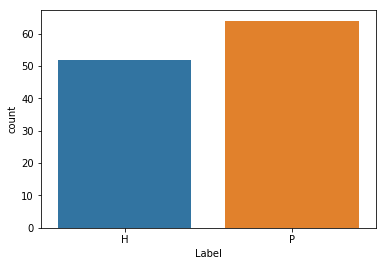

In [6]:
ax = sns.countplot(data.Label,label="Count")       
P, H = data.Label.value_counts()
print('Number of Healthy: ', H)
print('Number of Patients : ',P)

The above count plot shows that although the data is only 116 observations but it has a almost equal representation of the Healthy(52) and Patient(64)

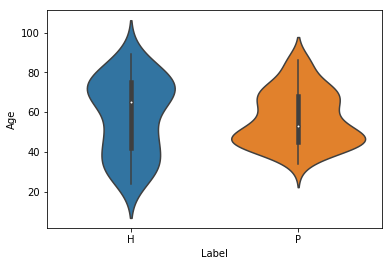

In [7]:
# The age distribution in the data
ax = sns.violinplot(x = "Label", y = "Age", data = blood_analysis)

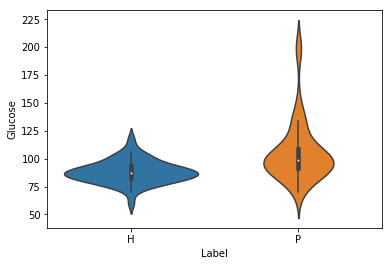

In [8]:
# The Glucose distribution in the data
ax1 = sns.violinplot(x="Label", y="Glucose", data=blood_analysis)

# The BMI distribution in the data
# ax2 = sns.violinplot(x="Label", y="BMI", data=blood_analysis)

## Subseting the Blood analysis data 
We made subsets of the data depending upon the age varaiable in groups of ten years because there are 51 ages represented in the dataset of 116 observations.

In [9]:
BC20_30 = blood_analysis[(blood_analysis.Age >=21) & (blood_analysis.Age <=30)]
BC20_30.shape #(5, 11), all healthy

BC31_40 = blood_analysis[(blood_analysis.Age >=31) & (blood_analysis.Age <=40)]
BC31_40.shape #(12, 11), has 4 patients

BC41_50 = blood_analysis[(blood_analysis.Age >=41) & (blood_analysis.Age <=50)]
BC41_50.shape #(31, 11) has 7 healthy rest patients

BC51_60 = blood_analysis[(blood_analysis.Age >=51) & (blood_analysis.Age <=60)]
BC51_60.shape #(16, 11), has 4 healthy

BC61_70 = blood_analysis[(blood_analysis.Age >=61) & (blood_analysis.Age <=70)]
BC61_70.shape #(22, 11), it has 11 healthy and 11 patients


BC71_80 = blood_analysis[(blood_analysis.Age >=71) & (blood_analysis.Age <=80)]
BC71_80.shape #(20, 11), has 8 patient and 12 Healthy
BC71_80.head(40)

BC81_90 = blood_analysis[(blood_analysis.Age >=81) & (blood_analysis.Age <=90)]
BC81_90.shape #(10, 11), has 5 patient and 5 Healthy
BC81_90.head(40)

BC20_30.to_csv('data/BC20_30.csv')
BC31_40.to_csv('data/BC31_40.csv')
BC41_50.to_csv('data/BC41_50.csv')
BC51_60.to_csv('data/BC51_0.csv')

### Analyzing the data to find the features which are most predictive of the classifier outcome

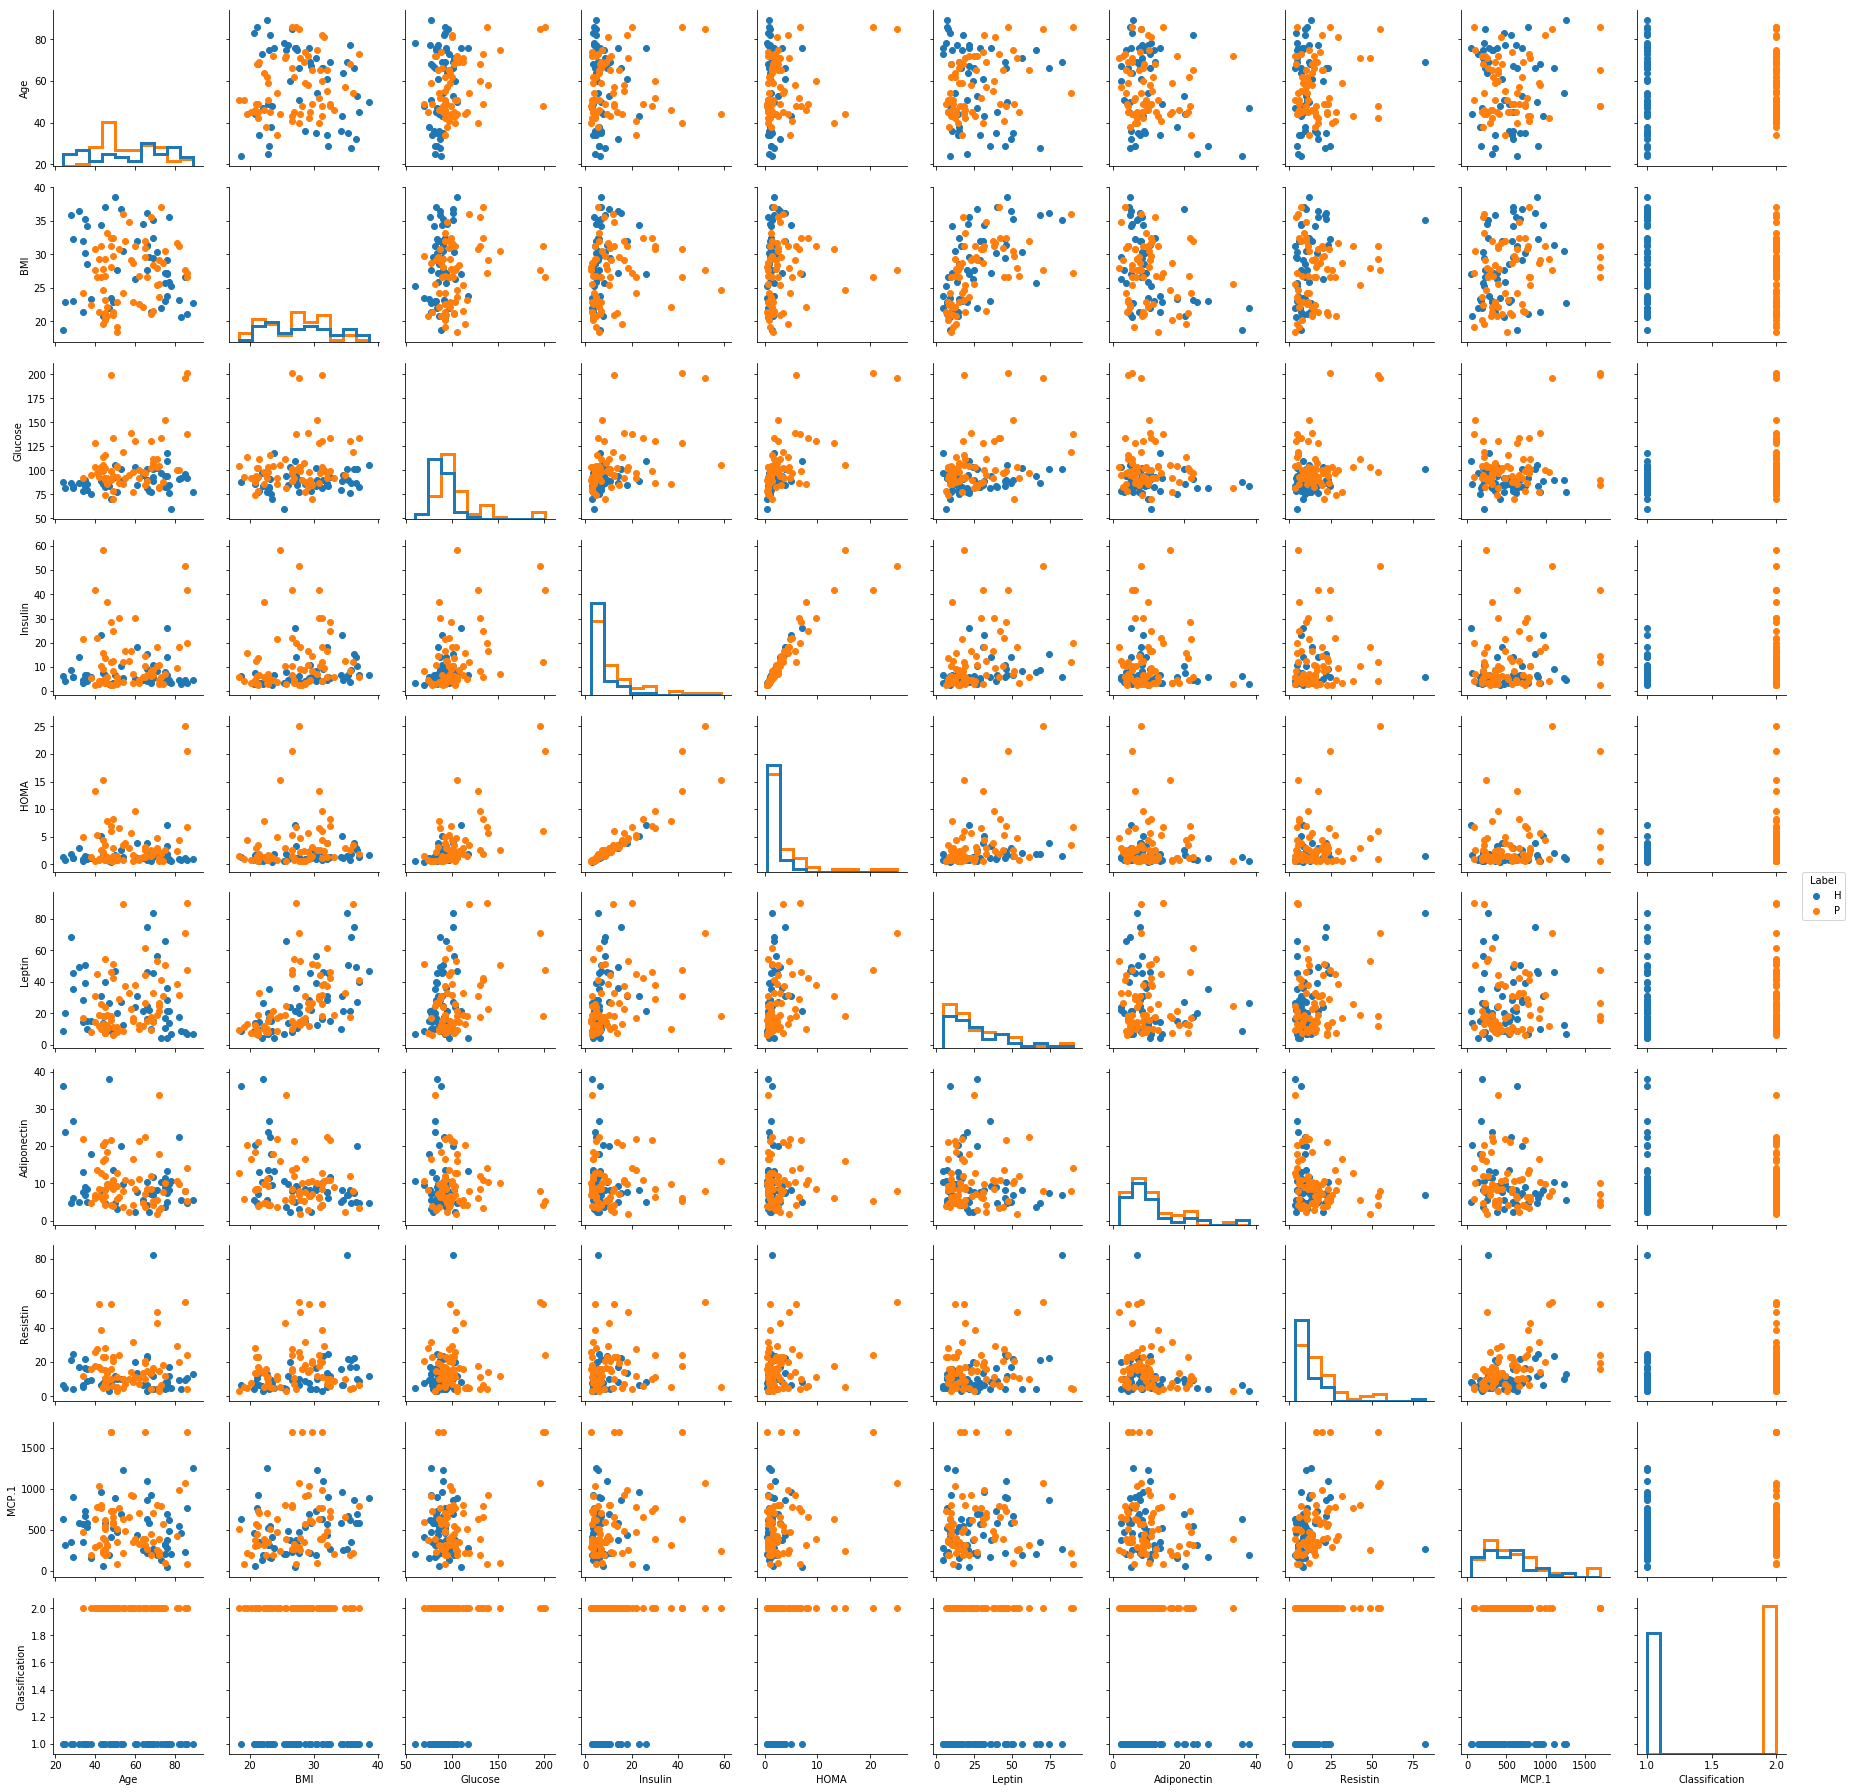

In [10]:
g = sns.PairGrid(blood_analysis, hue="Label")
g = g.map_diag(plt.hist, histtype="step", linewidth=3)
g = g.map_offdiag(plt.scatter)
g = g.add_legend()

Looking at the pair plots the corelation between the Classification and Glucose, Insulin, HOMA and Resistin there looks like a effect of these levels on the onset of cancer.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

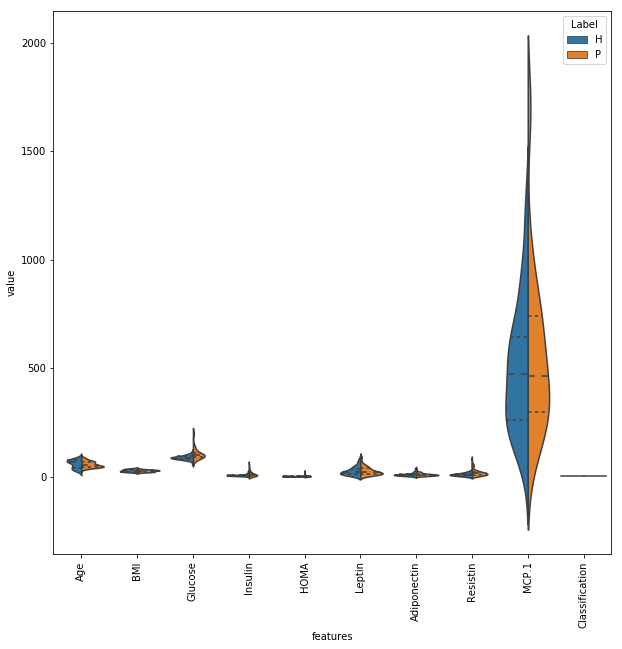

In [11]:
#ploting Violin plots for deeper visulaization of the feature correlation with the classification
data = pd.melt(blood_analysis,id_vars="Label",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="Label", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

The values are very far away for the various columns especially the MCP.1 we need standarization of the data before ploting again on same axis.

In [12]:
##function to normalize and standarize the data and make the voilin, swarm and the box plots to compare the features impact on classification

def outcome_age( df):
    sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
#     sns.set(style="whitegrid", palette="muted")
    y = df.Label

    x = df.drop(["Classification", "Label"], axis=1)

    data_n_2 = (x - x.mean()) / (x.std())              # standardization

    data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)

    data = pd.melt(data,id_vars="Label",
                    var_name="features",
                    value_name='value')

    plt.figure(figsize=(10,10))
    sns.violinplot(x="features", y="value", hue="Label", data=data,split=True, inner="quart")
    plt.xticks(rotation=90)
    
    plt.figure(figsize=(10,10))
    sns.swarmplot(x="features", y="value", hue="Label", data=data)
    plt.xticks(rotation=90)


    plt.figure(figsize=(10,10))
    sns.boxplot(x="features", y="value", hue="Label", data=data)
    plt.xticks(rotation=90)

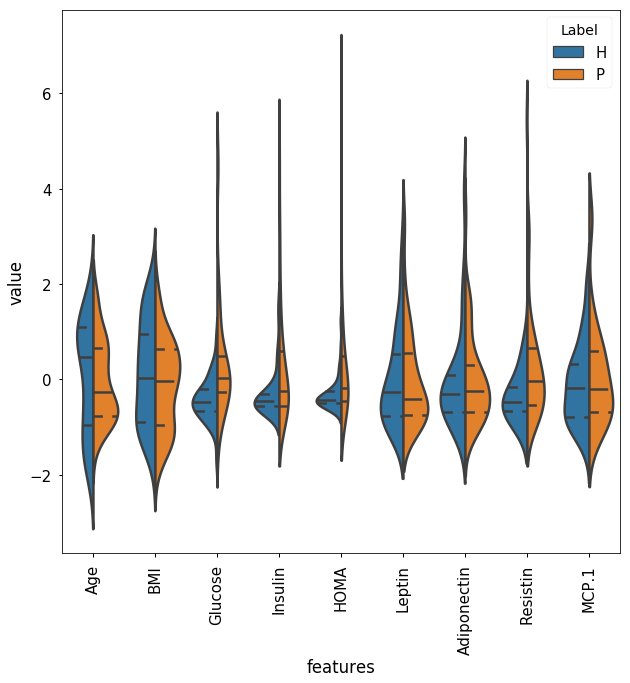

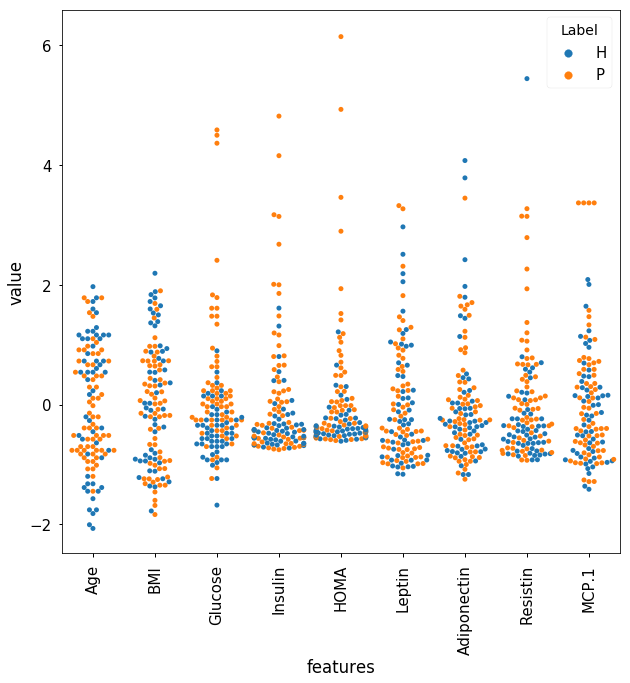

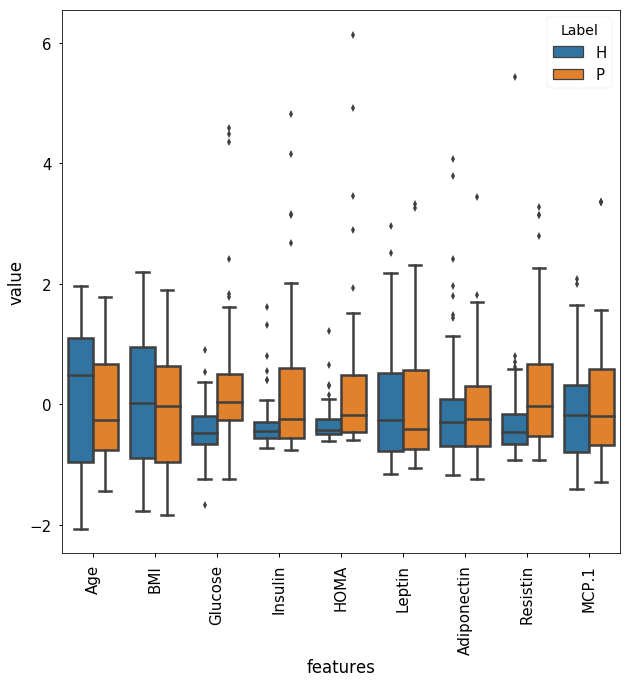

In [13]:
outcome_age(blood_analysis)

# Interpretion of the plots:
Lets interpret the plot above. For example, in Age, Glucose feature, median of the healthy and patient looks like separated so it can be good for classification. However, in MCP.1 feature, median of the healthy and patient does not looks like separated so it does not gives good information for classification.

They looks cool right. And you can see variance more clear. In this plot which feature looks like more clear in terms of classification. In my opinion as the data points for Healthy(blue dots) and Patient(orange dots) are disperssed all across and donot show direct corelation we need to explore further.

We will use the box plot for exploration. Looking at the pair plots the corelation between the Classification and Age, Glucose, Insulin, HOMA and Resistin there looks like a effect of these levels on the onset of cancer.



# Feature correlation:
Lets interpret one more thing about plot above, variable of Glucose and Resistin,, and Insulin and HOMA  looks like similar but how can we decide whether they are correlated with each other or not. (Not always true but, basically if the features are correlated with each other we can drop one of them)

# In order to compare two features deeper, lets use joint plot. 

# Glucose can replace Insulin and HOMA 
Pearsonr value is correlation value and 1 is the highest. 
Look at these in joint plot below, Glucose is not really correlated to Resistin as Pearson factor is 0.29 is not enough to say that they are correlated. It is also not correlated to Leptin, Adiponectin, Age, BMI or MCP.1.
Glucose is very highly correlated to Insulin(0.96) and HOMA(0.97) so it can be picked out of the three.

/Users/smitaupadhyay/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


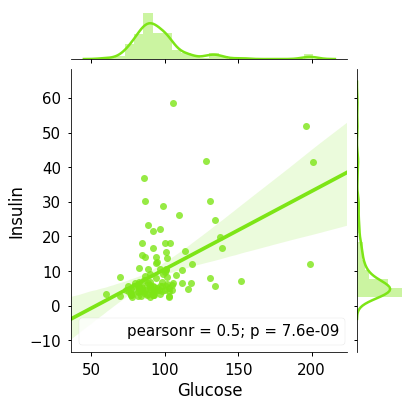

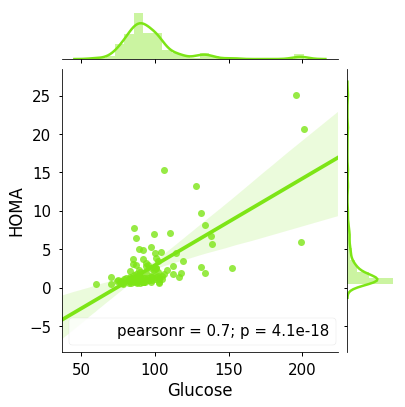

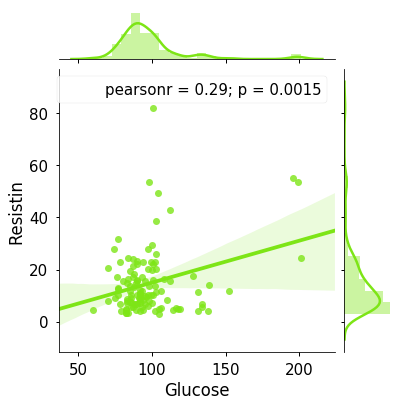

In [14]:
sns.jointplot(blood_analysis.loc[:,'Glucose'], blood_analysis.loc[:,'Insulin'], kind="regg", color="#7de516")
sns.jointplot(blood_analysis.loc[:,'Glucose'], blood_analysis.loc[:,'HOMA'], kind="regg", color="#7de516")
# sns.jointplot(x.loc[:,'Glucose'], x.loc[:,'BMI'], kind="regg", color="#7de516")
# sns.jointplot(x.loc[:,'Glucose'], x.loc[:,'Leptin'], kind="regg", color="#7de516")
# sns.jointplot(x.loc[:,'Glucose'], x.loc[:,'Adiponectin'], kind="regg", color="#7de516")
sns.jointplot(blood_analysis.loc[:,'Glucose'], blood_analysis.loc[:,'Resistin'], kind="regg", color="#7de516")

# Resistin is not correlated to any other feauture
Look at the joint plot, it is somewhat correlated to BMI(0.5) and Leptin(0.44). 

/Users/smitaupadhyay/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


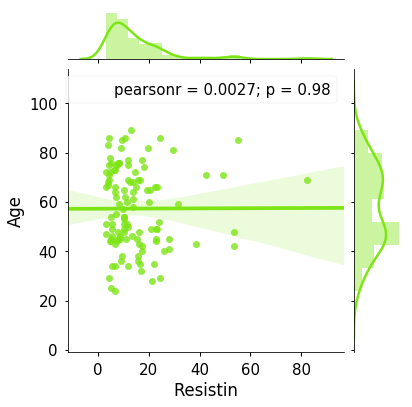

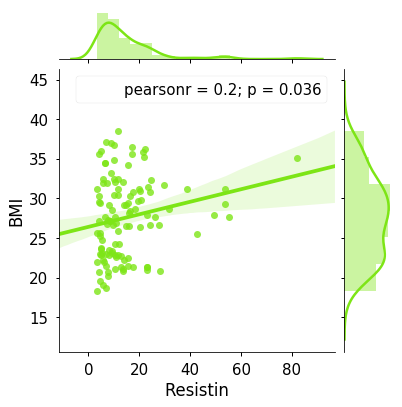

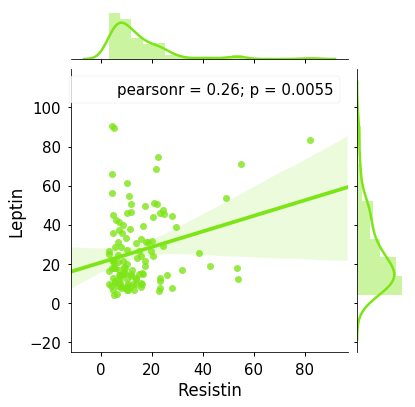

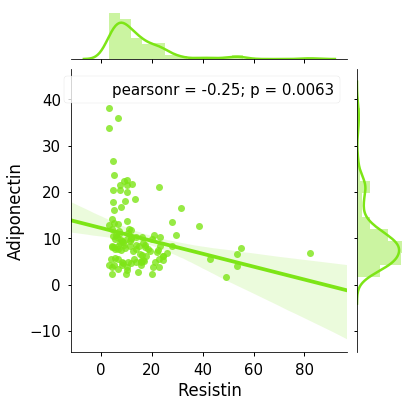

In [15]:
sns.jointplot(blood_analysis.loc[:,'Resistin'], blood_analysis.loc[:,'Age'], kind="regg", color="#7de516")
sns.jointplot(blood_analysis.loc[:,'Resistin'], blood_analysis.loc[:,'BMI'], kind="regg", color="#7de516")
sns.jointplot(blood_analysis.loc[:,'Resistin'], blood_analysis.loc[:,'Leptin'], kind="regg", color="#7de516")
sns.jointplot(blood_analysis.loc[:,'Resistin'], blood_analysis.loc[:,'Adiponectin'], kind="regg", color="#7de516")

# Age and  Leptin are not correlated. Age is inversely correlated to Adiponectin and BMI
Look at this in joint plot below.

/Users/smitaupadhyay/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


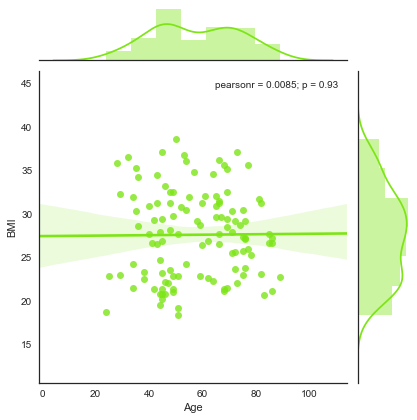

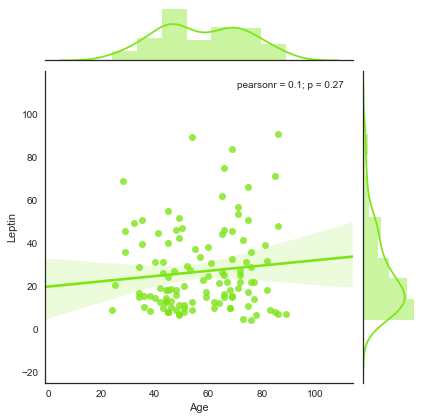

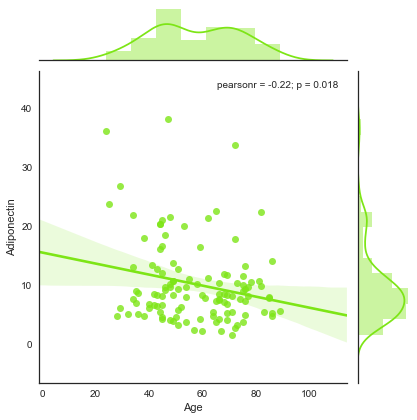

In [17]:
sns.jointplot(blood_analysis.loc[:,'Age'], blood_analysis.loc[:,'BMI'], kind="regg", color="#7de516")
sns.jointplot(blood_analysis.loc[:,'Age'], blood_analysis.loc[:,'Leptin'], kind="regg", color="#7de516")
sns.jointplot(blood_analysis.loc[:,'Age'], blood_analysis.loc[:,'Adiponectin'], kind="regg", color="#7de516")



# Looking at the multiple variable coreraltion together.

/Users/smitaupadhyay/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


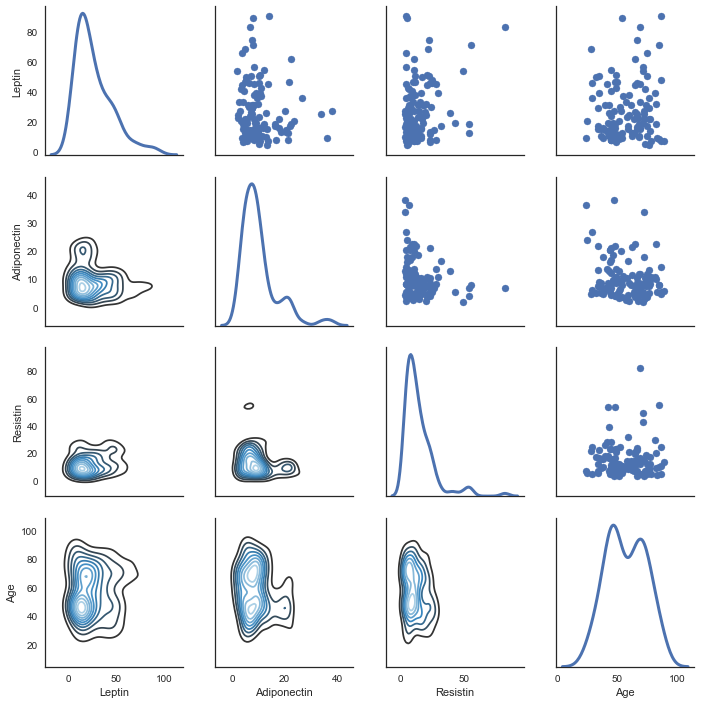

In [18]:
sns.set(style="white")
df = blood_analysis.loc[:,['Leptin','Adiponectin','Resistin','Age']]
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

I want to observe all correlation between features? 
The answer is heatmap that is old but powerful plot method.



In [ ]:
sns.set(style="white")
df = x.loc[:,['Glucose','HOMA','Insulin','Age']]
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

# Unbiased Correlation matrix to find correlations for feature selection

In [ ]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

MCP.1:: is not correlated to any parameter its highest correlation is with Resistin(0.4)
Resistin: is not correlated to any slight with MCP.1(0.4) and for Glucose and Leptin(0.3)
Adiponectin: is poorly negatively correlated to all the features.
Leptin: is somewhat correlated to BMI(0.6), for Glucose, Insulin, HOMA and Resistin(0.3)
HOMA: has the highest of all corr with Insulin(0.9) and the Glucose(0.7)


        

In [ ]:
g = sns.PairGrid(BC81_90, hue="Label")
g = g.map_diag(plt.hist, histtype="step", linewidth=3)
g = g.map_offdiag(plt.scatter)
g = g.add_legend()

In [ ]:
#DATA standarization
y81_90 = BC81_90.Label
x81_90 = BC81_90.drop(["Classification", "Label"], axis=1)

data_n_2 = (x81_90 - x81_90.mean()) / (x81_90.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="Label",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="Label", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

In [ ]:
# sns.set(style="whitegrid", palette="muted")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
y = BC81_90.Label
x = BC81_90.drop(["Classification", "Label"], axis=1)
data_n_2 = (x - x.mean()) / (x.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="Label",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
# tic = time.time()
sns.swarmplot(x="features", y="value", hue="Label", data=data)

plt.xticks(rotation=90)

plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="Label", data=data, color="#e51716")
plt.xticks(rotation=90)

In [ ]:
outcome_age(BC81_90)

In [ ]:
outcome_age(BC71_80)

In [ ]:
outcome_age(BC61_70)

In [ ]:
outcome_age(BC51_60)

In [ ]:
outcome_age(BC41_50);

In [ ]:
outcome_age(BC31_40)

In [ ]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(BC81_90.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [ ]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(BC31_40.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

# Looking at the correlations and effect on classification between different age gropus we are droping some features for prediction

In [ ]:
drop_list1 = ['Insulin','HOMA', 'Adiponectin', 'MCP.1','Label']
BC_drop = blood_analysis.drop(drop_list1,axis = 1 )        # do not modify x, we will use it later 
BC_drop.head()

In [ ]:
BC_drop_x = BC_drop.drop('Classification', axis=1)

In [ ]:
BC_drop_x.head()
# BC_drop_x.shape

Well, we choose our features but did we choose correctly ? Lets use random forest and find accuracy according to chosen features.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve, StratifiedKFold, train_test_split
from sklearn.feature_selection import RFECV, SelectFromModel

# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(BC_drop_x, BC_drop['Classification'],test_size=0.3, random_state=42)

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(x_train,y_train)

y_pred = clf_rf.predict(x_test)

ac = accuracy_score(y_test,y_pred)
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt="d")

In [ ]:
len(y_pred)

# Testing various other parameters to improve the acuracy score

It is known that the cancer cells have high metabolism and they consume more Glucose than healthy cell so after having features to Age, BMI, Glucose, Leptin and Resistin the accuracy score was 74% so to improve the score trying to find better feature combination by seeing the distribution of the five over the helathy and the patient by ploting.

In [ ]:
sns.set_style("whitegrid")
plotOne = sns.FacetGrid(blood_analysis, hue="Classification",aspect=2.5)
plotOne.map(sns.kdeplot,'Glucose',shade=True)
plotOne.set(xlim=(0, blood_analysis['Glucose'].max()))
plotOne.add_legend()
plotOne.set_axis_labels('Glucose', 'Levels')
plotOne.fig.suptitle('Glucose vs Diagnosis (Blue = Healthy; Green = Patients)')
plt.show()


sns.set_style("whitegrid")
plotTwo = sns.FacetGrid(blood_analysis, hue="Classification",aspect=2.5)
plotTwo.map(sns.kdeplot,'BMI',shade= True)
plotTwo.set(xlim=(0, blood_analysis['BMI'].max()))
plotTwo.add_legend()
plotTwo.set_axis_labels('BMI', 'Levels')
plotTwo.fig.suptitle('BMI vs Diagnosis (Blue = Healthy; Green = Patients)')
plt.show()

sns.set_style("whitegrid")
plotThree = sns.FacetGrid(blood_analysis, hue="Classification",aspect=2.5)
plotThree.map(sns.kdeplot,'Leptin',shade= True)
plotThree.set(xlim=(0, blood_analysis['Leptin'].max()))
plotThree.add_legend()
plotThree.set_axis_labels('Leptin', 'Levels')
plotThree.fig.suptitle('Leptin vs Diagnosis (Blue = Healthy; Green = Patients)')
plt.show()

sns.set_style("whitegrid")
plotFour = sns.FacetGrid(blood_analysis, hue="Classification",aspect=2.5)
plotFour.map(sns.kdeplot,'Resistin',shade= True)
plotFour.set(xlim=(0, blood_analysis['Resistin'].max()))
plotFour.add_legend()
plotFour.set_axis_labels('Resistin', 'Levels')
plotFour.fig.suptitle('Resistin vs Diagnosis (Blue = Healthy; Green = Patients)')
plt.show()

sns.set_style("whitegrid")
plotFive = sns.FacetGrid(blood_analysis, hue="Classification",aspect=2.5)
plotFive.map(sns.kdeplot,'Age',shade= True)
plotFive.set(xlim=(0, blood_analysis['Age'].max()))
plotFive.add_legend()
plotFive.set_axis_labels('Age', 'Proporations')
plotFive.fig.suptitle('Age vs Diagnosis (Blue = Healthy; Green = Patients)')
plt.show()

We see that Leptin in healthy and Patient curves are almost overlapping so we drop it and see the score the score drops to 68% so not a good idea.


In [ ]:
drop_list2 = ['Leptin','Insulin','HOMA', 'Adiponectin', 'MCP.1','Label']
BC_drop2 = blood_analysis.drop(drop_list2,axis = 1 )        # do not modify x, we will use it later 
BC_drop2.head()
BC_drop_x2 = BC_drop2.drop('Classification', axis=1)
BC_drop_x2.head()
BC_drop_x2.shape

# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(BC_drop_x2, BC_drop2['Classification'],test_size=0.3, random_state=42)

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(x_train,y_train)

y_pred = clf_rf.predict(x_test)

ac = accuracy_score(y_test,y_pred)
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt="d")

In [ ]:
BC_drop_x2.head()

# The Score is 82% 
Droping leptin alone is not a good idea but looking at the distribution curves if we look at age it is also distributed all over so if we drop age. 

In [ ]:
drop_list3 = ['Age','Leptin','Insulin','HOMA', 'Adiponectin', 'MCP.1','Label']
BC_drop3 = blood_analysis.drop(drop_list3,axis = 1 )        # do not modify x, we will use it later 
BC_drop3.head()
BC_drop_x3 = BC_drop3.drop('Classification', axis=1)
BC_drop_x3.head()
BC_drop_x3.shape

# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(BC_drop_x3, BC_drop3['Classification'],test_size=0.3, random_state=42)

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(x_train,y_train)

y_pred = clf_rf.predict(x_test)

ac = accuracy_score(y_test,y_pred)
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt="d")

In [ ]:
BC_drop3.head()
BC_drop_x3.head()
blood_analysis.head()

# Using a unbiased feature selection model lets see if we can find similar features for predication

In [ ]:
BCdrop = blood_analysis.drop(['Classification', 'Label'], axis=1)
BCdrop.head()

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best scored 5 features


select_feature = SelectKBest(chi2, k=5).fit(BCdrop, blood_analysis['Classification'])
print('Score list:', select_feature.scores_)
print('Feature list:', x_train.columns)

# Use PCA transformation to select features and reduce feature correlation.

In [ ]:
from sklearn.decomposition import PCA
X3=BCdrop
y3=blood_analysis['Classification']
variance_pct = 4 # Minimum percentage of variance we want to be described by the resulting transformed components
pca = PCA(n_components=variance_pct) # Create PCA object
X_transformed = pca.fit_transform(X3,y3) # Transform the initial features
X3pca = pd.DataFrame(X_transformed) # Create a data frame from the PCA'd data
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(X3pca, y3, test_size=0.2)
print('\n Feature Names: \n\n', X3pca.columns.values, "\n")
#print('First Few Values, After PCA: \n\n,',X3pca.head(),'\n\n')
print("\nFeature Correlation:\n")
g = sns.heatmap(X_train3.corr(),cmap="BrBG",annot=False)


In [ ]:
from sklearn import tree

import graphviz 
%matplotlib inline


clf3 = tree.DecisionTreeClassifier(max_depth=3,min_samples_leaf=12)
clf3.fit(X_train3, Y_train3)

In [ ]:
print('Accuracy of Decision Tree classifier on PCA-transformed training set: {:.2f}'.format(clf3.score(X_train3, Y_train3)))
print('Accuracy of Decision Tree classifier on PCA-transformed test set: {:.2f}'.format(clf3.score(X_test3, Y_test3)))

In [ ]:
feature_names1 = BCdrop.columns.values
# feature_names2 = X2.columns.values
feature_names3 = X3pca.columns.values

def plot_decision_tree1(a,b):
    dot_data = tree.export_graphviz(a, out_file=None, 
                             feature_names=b,  
                             class_names=['Healthy','Patient'],  
                             filled=False, rounded=True,  
                             special_characters=False)  
    graph = graphviz.Source(dot_data)  
    return graph 
plot_decision_tree1(clf3,feature_names3)

# Decission tree classifier on the original data without feature selection

In [ ]:
Xx = blood_analysis.drop(['Classification', 'Label'], axis=1)
yy = blood_analysis['Classification']
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(Xx, yy, test_size=0.3)
print('\n Feature Names: \n\n', Xx.columns.values, "\n")

In [ ]:


clf1 = tree.DecisionTreeClassifier(max_depth=3,min_samples_leaf=12)
clf1.fit(X_train1, Y_train1)

print('Accuracy of Decision Tree classifier on original training set: {:.2f}'.format(clf1.score(X_train1, Y_train1)))
print('Accuracy of Decision Tree classifier on original test set: {:.2f}'.format(clf1.score(X_test1, Y_test1)))

In [ ]:
feature_names1 = Xx.columns.values
# feature_names2 = X2.columns.values
# feature_names3 = X3pca.columns.values

def plot_decision_tree1(a,b):
    dot_data = tree.export_graphviz(a, out_file=None, 
                             feature_names=b,  
                             class_names=['Healthy','Patient'],  
                             filled=False, rounded=True,  
                             special_characters=False)  
    graph = graphviz.Source(dot_data)  
    return graph 
plot_decision_tree1(clf1,feature_names1)

In [ ]:
Xxx = BC_drop_x3
yyy = blood_analysis['Classification']
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(Xxx, yyy, test_size=0.3)
print('\n Feature Names: \n\n', Xxx.columns.values, "\n")

In [ ]:
clf2 = tree.DecisionTreeClassifier(max_depth=3,min_samples_leaf=12)
clf2.fit(X_train2, Y_train2)

print('Accuracy of Decision Tree classifier on reduced training set: {:.2f}'.format(clf2.score(X_train2, Y_train2)))
print('Accuracy of Decision Tree classifier on reduced test set: {:.2f}'.format(clf2.score(X_test2, Y_test2)))

In [ ]:
# BC_drop_x: ['Age' 'BMI' 'Glucose' 'Leptin' 'Resistin'] 

# Accuracy of Decision Tree classifier on reduced training set: 0.75
# Accuracy of Decision Tree classifier on reduced test set: 0.71

# BC_drop_x2: ['Age' 'BMI' 'Glucose' 'Resistin'] 
# Accuracy of Decision Tree classifier on reduced training set: 0.79
# Accuracy of Decision Tree classifier on reduced test set: 0.66

# BC_drop_x3: ['BMI' 'Glucose' 'Resistin'] 
# Accuracy of Decision Tree classifier on reduced training set: 0.83
# Accuracy of Decision Tree classifier on reduced test set: 0.57

In [ ]:
clf1 = tree.DecisionTreeClassifier(max_depth=3,min_samples_leaf=12)
clf1.fit(x_train, y_train)
clf2 = tree.DecisionTreeClassifier(max_depth=3,min_samples_leaf=12)
clf2.fit(X_train2, Y_train2)
clf3 = tree.DecisionTreeClassifier(max_depth=3,min_samples_leaf=12)
clf3.fit(X_train3, Y_train3)
print('Accuracy of Decision Tree classifier on original training set: {:.2f}'.format(clf1.score(x_train, y_train)))
print('Accuracy of Decision Tree classifier on original test set: {:.2f}'.format(clf1.score(x_test, y_test)))
print('Accuracy of Decision Tree classifier on reduced training set: {:.2f}'.format(clf2.score(X_train2, Y_train2)))
print('Accuracy of Decision Tree classifier on reduced test set: {:.2f}'.format(clf2.score(X_test2, Y_test2)))
print('Accuracy of Decision Tree classifier on PCA-transformed training set: {:.2f}'.format(clf3.score(X_train3, Y_train3)))
print('Accuracy of Decision Tree classifier on PCA-transformed test set: {:.2f}'.format(clf3.score(X_test3, Y_test3)))

# Plotting learning curves

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


In [ ]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [ ]:
X, y = blood_analysis.drop(['Classification', 'Label'], axis=1), blood_analysis.Classification

In [ ]:
title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

estimator = GaussianNB()
plot_learning_curve(estimator, title, X, y, ylim=(0.0, 1.5), cv=cv, n_jobs=4)

In [ ]:
title = "Learning Curves (SVM(Support vector Machines), RBF kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

estimator = SVC(gamma=0.001)
plot_learning_curve(estimator, title, X, y, (0.0, 1.5), cv=cv, n_jobs=4)

plt.show()

In [ ]:
from sklearn import svm
#Create a svm Classifier
# clf_svm = svm.SVC(kernel='linear') # Linear Kernel  prediction is 0.8

clf_svm = svm.SVC(kernel='poly', degree=3, C=1.0) # polynomial Kernel

# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(BC_drop_x, BC_drop['Classification'],test_size=0.3, random_state=42)


#Train the model using the training sets
clf_svm.fit(x_train, y_train)
#Predict the response for test dataset
y_pred = clf_svm.predict(x_test)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


In [ ]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

In [ ]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out



# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(BC_drop_x, BC_drop['Classification'],test_size=0.3, random_state=42)



# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C))

#Train the model using the training sets
# clf.fit(x_train, y_train)
# #Predict the response for test dataset
# y_pred = clf_svm.predict(x_test)
models = (clf.fit(x_train, y_train) for clf in models)

# # title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# # Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# X0, X1 = BC_drop_x[:, 0], BC_drop_x[:, 1]
# xx, yy = make_meshgrid(X0, X1)

# for clf, title, ax in zip(models, titles, sub.flatten()):
#     plot_contours(ax, clf, xx, yy,
#                   cmap=plt.cm.coolwarm, alpha=0.8)
#     ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
#     ax.set_xlim(xx.min(), xx.max())
#     ax.set_ylim(yy.min(), yy.max())
#     ax.set_xlabel('Sepal length')
#     ax.set_ylabel('Sepal width')
#     ax.set_xticks(())
#     ax.set_yticks(())
#     ax.set_title(title)

plt.show()

In [ ]:
from sklearn import svm, datasets

datasets.make_s_curve(n_samples=100, noise=0.0, random_state=None)

In [ ]:
df_random = pd.DataFrame(np.random.randint(20, 150, size=(5, 3)), columns=['A', 'B', 'C'])
df_random

In [ ]:
BC31_40

In [ ]:
import plotly.plotly as py
import plotly.graph_objs as go 

In [ ]:
import plotly
import plotly.plotly as py
import plotly.graph_objs as go

data1 = [go.Bar(x=BC31_40.Glucose,
            y=BC31_40.Insulin)]

# py.iplot(data1)
plotly.offline.plot(data1)

In [ ]:
import matplotlib.pyplot as plt
import plotly.plotly as py

# mpl_fig = plt.figure()
# # --> your matplotlib methods <--

# unique_url = py.plot_mpl(mpl_fig, filename="plotly version of an mpl figure")

In [ ]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
y = BC81_90.Label
x = BC81_90.drop(["Classification", "Label"], axis=1)
data_n_2 = (x - x.mean()) / (x.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="Label",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
# tic = time.time()
sns.swarmplot(x="features", y="value", hue="Label", data=data)

plt.xticks(rotation=90)

# plt.figure(figsize=(10,10))
# sns.boxplot(x="features", y="value", hue="Label", data=data, color="#e51716")
# plt.xticks(rotation=90)

In [ ]:
import matplotlib.pyplot as plt
import plotly.tools as tls

mpl_fig = plt.figure()
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
y = BC81_90.Label
x = BC81_90.drop(["Classification", "Label"], axis=1)
data_n_2 = (x - x.mean()) / (x.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="Label",
                    var_name="features",
                    value_name='value')
# plt.figure(figsize=(10,10))
# tic = time.time()
sns.swarmplot(x="features", y="value", hue="Label", data=data)

plt.xticks(rotation=90)

# plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="Label", data=data, color="#e51716")
plt.xticks(rotation=90)
# --> your matplotlib methods <--

plotly_fig = tls.mpl_to_plotly(mpl_fig)

# py.iplot(data1)
# plotly.offline.plot(data1)
# unique_url = py.plot(plotly_fig)
unique_url = plotly.offline.plot(plotly_fig)

In [ ]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
y = BC81_90.Label
x = BC81_90.drop(["Classification", "Label"], axis=1)
data_n_2 = (x - x.mean()) / (x.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="Label",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))

sns.swarmplot(x="features", y="value", hue="Label", data=data)

plt.xticks(rotation=90)

plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="Label", data=data, color="#e51716")
plt.xticks(rotation=90)